In [1]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
label_encoder = LabelEncoder()
import json

In [2]:
data = json.load(open('nsl.json'))

In [3]:
dataList = list(data.keys())

In [4]:
baredf = pd.read_csv("../../../data/nslkdd/KDDTrain+.txt", names=dataList, header=None, index_col=False)

In [5]:
baredf.shape

(125973, 43)

In [6]:
baredf.tail(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,extra
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [7]:
baredf.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [8]:
for col in baredf.columns:
    if baredf[col].dtype == "object":
        print(f'{baredf[col].value_counts()} ')

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64 
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64 
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64 
class
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule         

In [9]:
baredf.iloc[:, :20].sample(15)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds
110611,0,udp,domain_u,SF,43,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98124,0,udp,private,SF,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
116019,0,tcp,http,SF,211,9908,0,0,0,0,0,1,0,0,0,0,0,0,0,0
34507,26,tcp,ftp,SF,333,1072,0,0,0,6,0,1,0,0,0,0,0,0,0,0
69664,0,tcp,http,SF,189,10372,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4114,0,tcp,daytime,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106185,0,tcp,http,SF,304,1075,0,0,0,0,0,1,0,0,0,0,0,0,0,0
70448,0,tcp,smtp,SF,1244,336,0,0,0,0,0,1,0,0,0,0,0,0,0,0
106638,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68834,30,tcp,ftp,SF,1484,4152,0,0,0,30,0,1,0,0,0,0,0,0,0,0


In [10]:
baredf.iloc[:20, :].sample(15)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,extra
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
14,0,tcp,name,S0,0,0,0,0,0,0,...,0.00,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
18,0,tcp,http,SF,233,616,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.02,0.00,normal,21
19,0,tcp,http,SF,343,1178,0,0,0,0,...,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal,21
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
13,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.20,0.00,0.00,0.00,0.00,warezclient,15
17,0,icmp,eco_i,SF,18,0,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,ipsweep,18
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
16,0,tcp,http,SF,300,13788,0,0,0,0,...,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,normal,21


In [11]:
baredf.columns.tolist()

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'class',
 'extra']

In [12]:
from scipy.stats import skew, kurtosis, mode
import matplotlib.pyplot as plt 

In [13]:
def plot_categorical_distribution_ax(series, ax):
    counts = series.value_counts()
    mode_val = counts.idxmax()
    mode_freq = counts.max()
    num_unique = counts.size

    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Distribuição Categórica: {series.name}')
    ax.set_ylabel('Frequência')
    ax.set_xlabel('Categoria')

    textstr = f'Categorias: {num_unique}\nModa: {mode_val} ({mode_freq})'
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

def plot_numerical_stats_ax(series, ax):
    mean_val = series.mean()
    median_val = series.median()
    mode_vals = series.mode()
    mode_val = mode_vals.iloc[0] if not mode_vals.empty else None
    std_val = series.std()
    skew_val = skew(series.dropna())
    kurt_val = kurtosis(series.dropna())

    # Boxplot no eixo
    ax.boxplot(series.dropna(), vert=False)
    ax.set_title(f'Boxplot: {series.name}')
    ax.set_xlabel('Valor')

    # Texto com as métricas
    textstr = (f'Média: {mean_val:.2f}\nModa: {mode_val}\nMediana: {median_val:.2f}\n'
               f'Desvio Padrão: {std_val:.2f}\nSkewness: {skew_val:.2f}\nKurtosis: {kurt_val:.2f}')
    
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))


def analyze_and_plot(baredf, data):
    # Separar colunas por tipo
    numeric_cols = sorted([col for col, tipo in data.items() if tipo == 'real' and col in baredf.columns])
    categorical_cols = sorted([col for col, tipo in data.items() if tipo != 'real' and col in baredf.columns])
    
    print(f"Colunas Numéricas ({len(numeric_cols)}): {numeric_cols}")
    print(f"Colunas Categóricas ({len(categorical_cols)}): {categorical_cols}")
    
    # Número total de gráficos = soma dos dois grupos
    total_plots = len(numeric_cols) + len(categorical_cols)
    ncols = 2
    nrows = (total_plots + ncols - 1) // ncols
    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
    axs = axs.flatten()
    
    i = 0
    # Plotar numéricos
    for col in numeric_cols:
        plot_numerical_stats_ax(baredf[col], axs[i])
        i += 1
    # Plotar categóricos
    for col in categorical_cols:
        plot_categorical_distribution_ax(baredf[col], axs[i])
        i += 1
    
    # Remover subplots extras
    for j in range(i, len(axs)):
        fig.delaxes(axs[j])
    
    fig.tight_layout()
    return fig


Colunas Numéricas (35): ['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'dst_host_same_src_port_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'duration', 'extra', 'hot', 'num_access_files', 'num_compromised', 'num_failed_logins', 'num_file_creations', 'num_outbound_cmds', 'num_root', 'num_shells', 'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate', 'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate', 'srv_serror_rate', 'su_attempted', 'urgent', 'wrong_fragment']
Colunas Categóricas (8): ['class', 'flag', 'is_guest_login', 'is_host_login', 'land', 'logged_in', 'protocol_type', 'service']


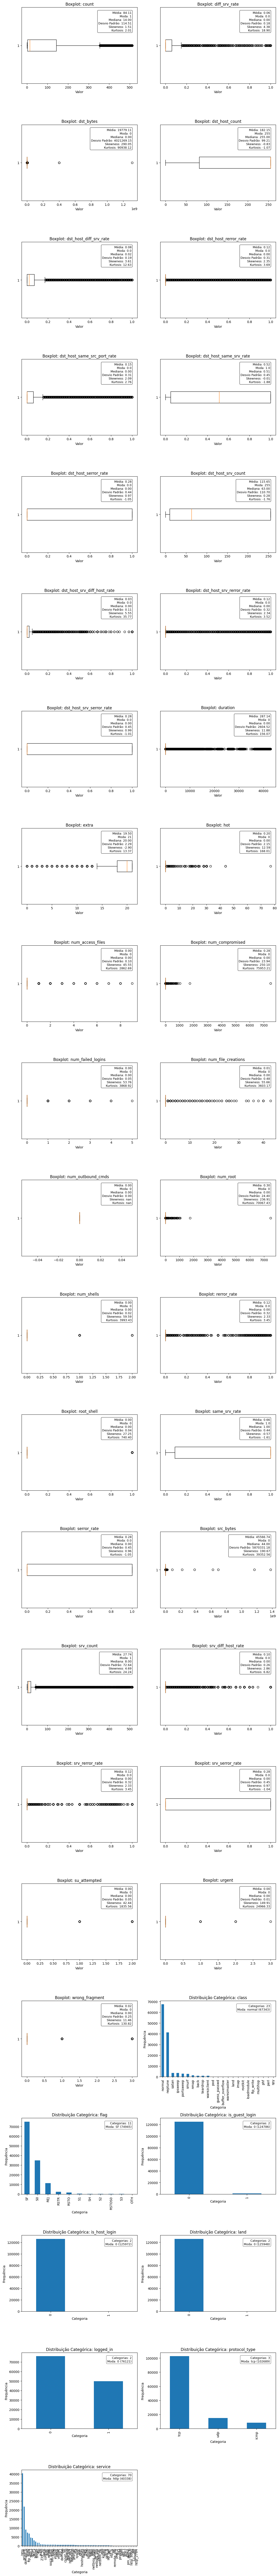

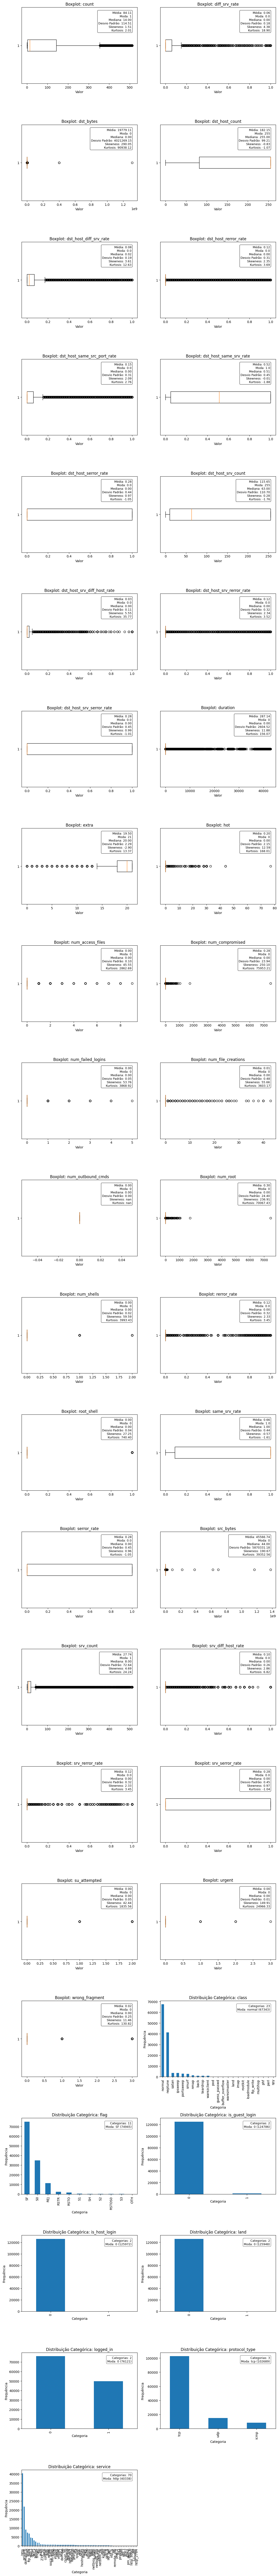

In [14]:
analyze_and_plot(baredf, data)

In [15]:
baredf = baredf.drop("extra", axis=1)

In [16]:
baredf['class'] = baredf.apply( lambda x: 0 if x['class'] == 'normal' else 1, axis=1)

In [17]:
baredf['protocol_type'] = label_encoder.fit_transform(baredf['protocol_type'])
baredf['flag'] = label_encoder.fit_transform(baredf['flag'])
baredf['service'] = label_encoder.fit_transform(baredf['service'])

In [18]:
baredf = pd.DataFrame(MaxAbsScaler().fit_transform(baredf))

In [19]:
ben = baredf[baredf[41] == 0]
att = baredf[baredf[41] != 0]

In [20]:
ben.shape

(67343, 42)

In [21]:
att.shape

(58630, 42)

In [22]:
ben = ben.iloc[:50000, :]
ben.shape

(50000, 42)

In [23]:
att = att.iloc[:50000, :]
att.shape

(50000, 42)

In [24]:
baredf.shape

(125973, 42)

In [25]:
baredf = pd.concat([att, ben])

In [26]:
baredf.shape

(100000, 42)

In [27]:
baredf.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
93540,0.000000,0.5,0.289855,0.9,6.032767e-06,0.000000e+00,0.0,0.0,0.0,0.0,...,0.219608,0.22,0.02,0.22,0.00,0.00,0.00,0.0,0.0,0.0
93544,0.000023,0.5,0.782609,0.9,1.679754e-06,2.503936e-07,0.0,0.0,0.0,0.0,...,0.415686,0.60,0.02,0.01,0.00,0.00,0.00,0.0,0.0,0.0
93545,0.000000,0.5,0.347826,0.9,3.282695e-07,5.241472e-06,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.01,0.01,0.0,0.0,0.0
93550,0.000000,1.0,0.173913,0.9,3.333421e-08,3.511618e-08,0.0,0.0,0.0,0.0,...,0.976471,0.98,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0
93557,0.000000,0.5,0.347826,0.9,1.442067e-07,6.015555e-07,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.01,0.00,0.00,0.0,0.0,0.0


In [28]:
baredf.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
49594,0.0,0.5,0.347826,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.105882,0.29,0.04,0.02,0.0,0.98,1.0,0.0,0.0,1.0
6968,0.0,0.5,0.347826,0.9,2.608764e-07,2.053533e-07,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
6449,0.0,1.0,0.173913,0.9,3.260955e-08,6.107162e-08,0.0,0.0,0.0,0.0,...,0.996078,1.00,0.01,0.01,0.0,0.00,0.0,0.0,0.0,0.0
6218,0.0,0.5,0.710145,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.105882,0.11,0.06,0.00,0.0,0.00,0.0,1.0,1.0,1.0
24194,0.0,1.0,0.710145,0.9,7.608895e-08,1.114557e-07,0.0,0.0,0.0,0.0,...,0.913725,0.91,0.01,0.00,0.0,0.00,0.0,0.0,0.0,0.0


In [29]:
x = baredf.drop(columns=[41])
y=baredf[41]

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [31]:
treinoX, testeX, treinoY, testey = train_test_split(x, y, train_size=0.7, random_state=42)

In [32]:
dt = DecisionTreeClassifier()
dt.fit(treinoX, treinoY)
dtPred = dt.predict(testeX)
accuracy_score(testey, dtPred)

0.9979

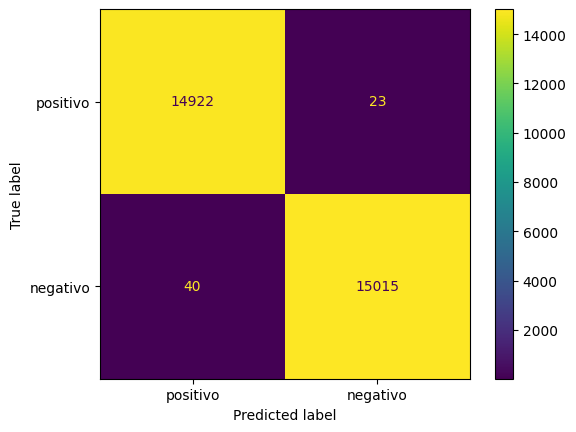

In [33]:
dtmc = confusion_matrix(testey, dtPred)
ConfusionMatrixDisplay(dtmc, display_labels=['positivo', 'negativo']).plot()

In [34]:
rf = RandomForestClassifier()
rf.fit(treinoX, treinoY)
rfPred = rf.predict(testeX)
accuracy_score(testey, rfPred)

0.9987333333333334

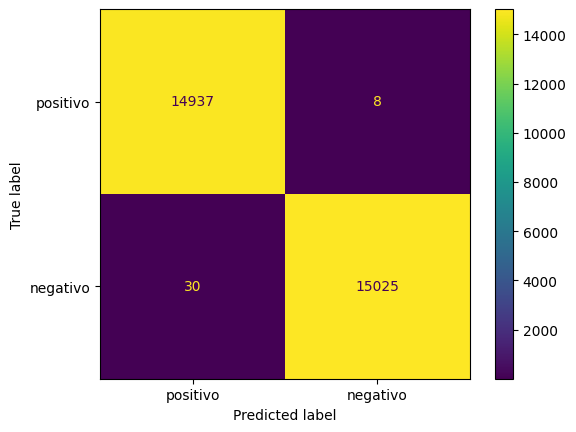

In [35]:
rfmc = confusion_matrix(testey, rfPred)
ConfusionMatrixDisplay(rfmc, display_labels=['positivo', 'negativo']).plot()

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(treinoX, treinoY)
knnPred = knn.predict(testeX)
accuracy_score(testey, knnPred)

0.9939333333333333

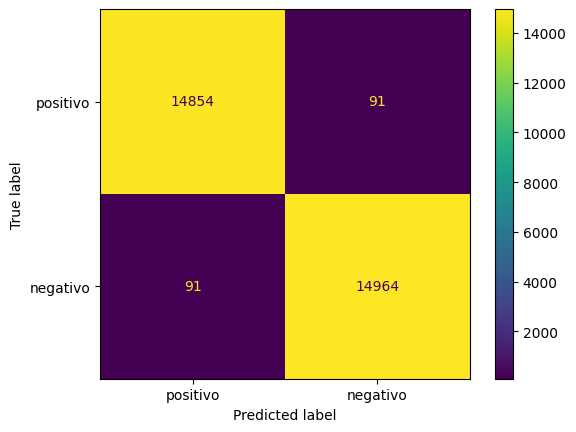

In [37]:
knnmc = confusion_matrix(testey, knnPred)
ConfusionMatrixDisplay(knnmc, display_labels=['positivo', 'negativo']).plot()

In [38]:
etc = ExtraTreesClassifier(criterion="entropy", verbose=1)
etc.fit(treinoX, treinoY)
etcPred = etc.predict(testeX)
accuracy_score(testey, etcPred)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


0.9982333333333333

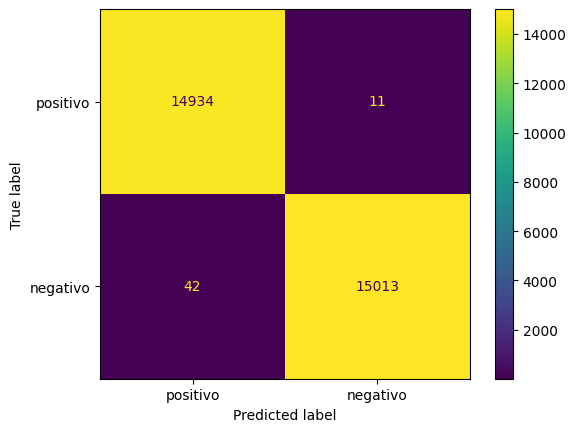

In [39]:
etcmc = confusion_matrix(testey, etcPred)
ConfusionMatrixDisplay(etcmc, display_labels=['positivo', 'negativo']).plot()

In [40]:
# Plotting ROC curves for each model
def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

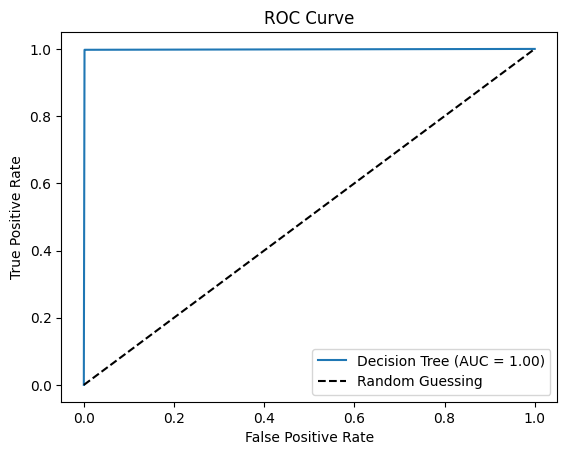

In [41]:
plot_roc_curve(testey, dt.predict_proba(testeX)[:, 1], 'Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


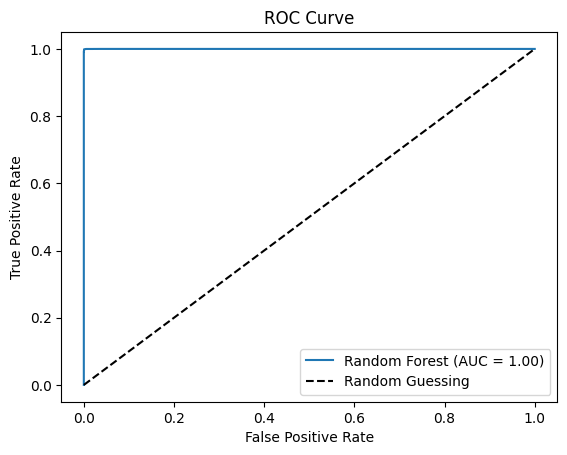

In [42]:
plot_roc_curve(testey, rf.predict_proba(testeX)[:, 1], 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

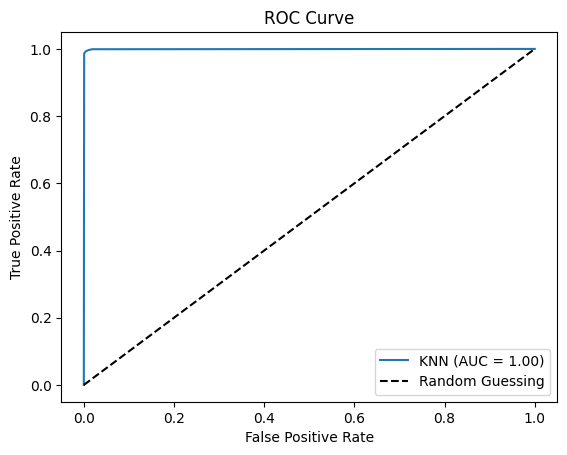

In [43]:
plot_roc_curve(testey, knn.predict_proba(testeX)[:, 1], 'KNN')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


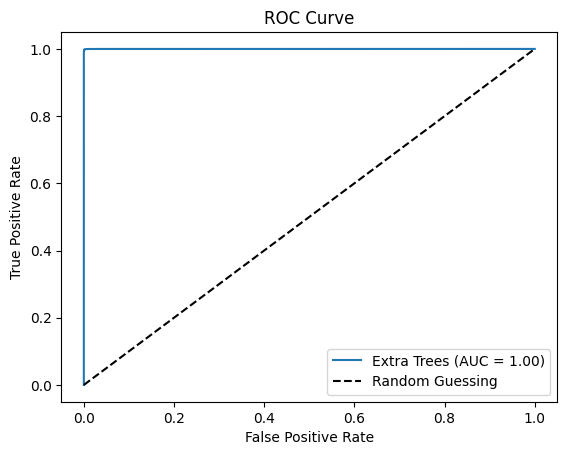

In [44]:
plot_roc_curve(testey, etc.predict_proba(testeX)[:, 1], 'Extra Trees')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

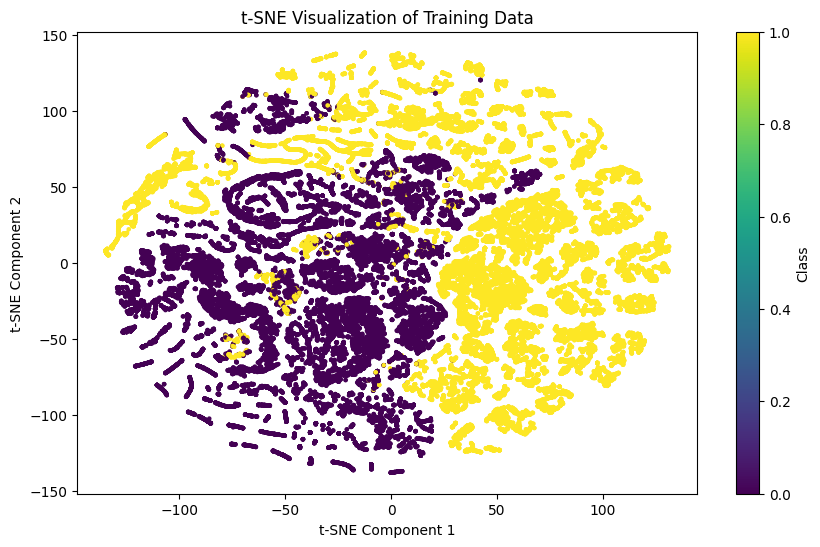

In [45]:
# Visualizing the data with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(treinoX)
plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=treinoY, cmap='viridis', s=5)
plt.colorbar(label='Class')
plt.title('t-SNE Visualization of Training Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
# Visualizing the data with t-SNE for test set
X_test_embedded = tsne.fit_transform(testeX)

In [46]:
# baredf.to_csv('nslClean.csv', index=False)

In [47]:
import time
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.base import clone

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [48]:
def benchmark_modelos(modelos, X_train, y_train, X_test, y_test):
    resultados = []

    for nome, modelo in modelos.items():
        print(f"Treinando {nome}...")

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', clone(modelo))
        ])

        start = time.time()
        pipeline.fit(X_train, y_train)
        treina_duracao = time.time() - start

        start = time.time()
        y_pred = pipeline.predict(X_test)
        pred_duracao = time.time() - start

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        try:
            proba = pipeline.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, proba)
        except:
            roc = None

        resultados.append({
            'Modelo': nome,
            'Acurácia': acc,
            'ROC AUC': roc,
            'Tempo Treino (s)': round(treina_duracao, 4),
            'Tempo Predição (s)': round(pred_duracao, 4),
            'Tempo por Amostra (ms)': round((pred_duracao / len(X_test)) * 1000, 4),
            'Matriz de Confusão': cm
        })

    return pd.DataFrame(resultados)


In [49]:
X = baredf.iloc[:, :-1]
y = baredf.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [50]:
modelos = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100, criterion='entropy'),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'DecisionTree': DecisionTreeClassifier()
}


In [51]:
df_resultados = benchmark_modelos(modelos, X_train, y_train, X_test, y_test) 
print(df_resultados[['Modelo', 'Acurácia', 'ROC AUC', 'Tempo por Amostra (ms)']])

Treinando KNN...
Treinando RandomForest...
Treinando ExtraTrees...
Treinando LogisticRegression...
Treinando SVM...
Treinando DecisionTree...
               Modelo  Acurácia   ROC AUC  Tempo por Amostra (ms)
0                 KNN  0.994567  0.999146                  0.2597
1        RandomForest  0.998700  0.999990                  0.0078
2          ExtraTrees  0.998533  0.999917                  0.0103
3  LogisticRegression  0.955267  0.991865                  0.0005
4                 SVM  0.991367  0.999102                  0.2579
5        DecisionTree  0.998033  0.998068                  0.0005


In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay,
    classification_report,
    accuracy_score, f1_score, roc_auc_score,
    precision_score, recall_score,
    precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
import os

def avaliar_modelos(modelos, X_train, X_test, y_train, y_test, class_names=None, salvar_em=None):
    if salvar_em:
        os.makedirs(salvar_em, exist_ok=True)

    for nome, modelo in modelos.items():
        print(f"\n Avaliando modelo: {nome}")

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', clone(modelo))
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        try:
            y_score = pipeline.predict_proba(X_test)[:, 1]
        except:
            y_score = None

        # Métricas
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        prec = precision_score(y_test, y_pred, pos_label=1)
        rec = recall_score(y_test, y_pred, pos_label=1)
        roc = roc_auc_score(y_test, y_score) if y_score is not None else 'N/A'

        print(f"Accuracy: {acc:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"ROC AUC: {roc if isinstance(roc, str) else round(roc, 4)}")
        print(classification_report(y_test, y_pred, target_names=class_names))

        # Criar figura com 3 plots (se ROC possível)
        ncols = 3 if y_score is not None else 1
        fig, axes = plt.subplots(1, ncols, figsize=(6 * ncols, 4))
        fig.suptitle(f"Métricas para {nome}", fontsize=16)

        # Matriz de Confusão
        cm = confusion_matrix(y_test, y_pred)
        tn, fp = cm[0]
        fn, tp = cm[1]
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        print(f"fpr: {fpr:.4f}")
        ConfusionMatrixDisplay(cm, display_labels=class_names).plot(ax=axes[0] if ncols > 1 else axes)
        if ncols > 1:
            axes[0].set_title("Matriz de Confusão")
        else:
            axes.set_title("Matriz de Confusão")

        # Curva ROC
        if y_score is not None:
            fpr, tpr, _ = roc_curve(y_test, y_score)
            RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=axes[1])
            axes[1].set_title("Curva ROC")

            # Curva Precision-Recall
            precision, recall, _ = precision_recall_curve(y_test, y_score)
            axes[2].plot(recall, precision, label="PR Curve")
            axes[2].set_title("Curva Precision-Recall")
            axes[2].set_xlabel("Recall")
            axes[2].set_ylabel("Precision")
            axes[2].legend()

        plt.tight_layout()

        # Salvar se necessário
        if salvar_em:
            caminho = os.path.join(salvar_em, f"{nome}_metricas.png")
            plt.savefig(caminho)
            print(f"Gráfico salvo em: {caminho}")

        plt.show()



 Avaliando modelo: KNN
Accuracy: 0.9946
F1 Score: 0.9946
Precision: 0.9948
Recall: 0.9944
ROC AUC: 0.9991
              precision    recall  f1-score   support

      normal       0.99      0.99      0.99     14945
     anomaly       0.99      0.99      0.99     15055

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000

fpr: 0.0052


/home/luizp/projects/puc/tcc/venv/lib64/python3.13/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


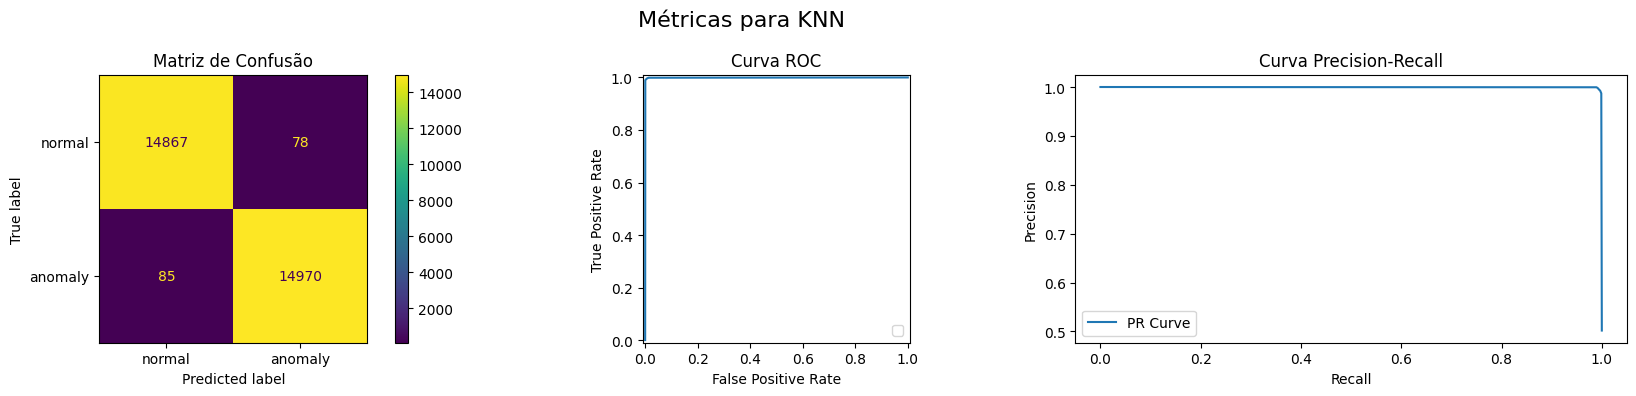


 Avaliando modelo: RandomForest
Accuracy: 0.9986
F1 Score: 0.9986
Precision: 0.9993
Recall: 0.9978
ROC AUC: 1.0
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     14945
     anomaly       1.00      1.00      1.00     15055

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

fpr: 0.0007


/home/luizp/projects/puc/tcc/venv/lib64/python3.13/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


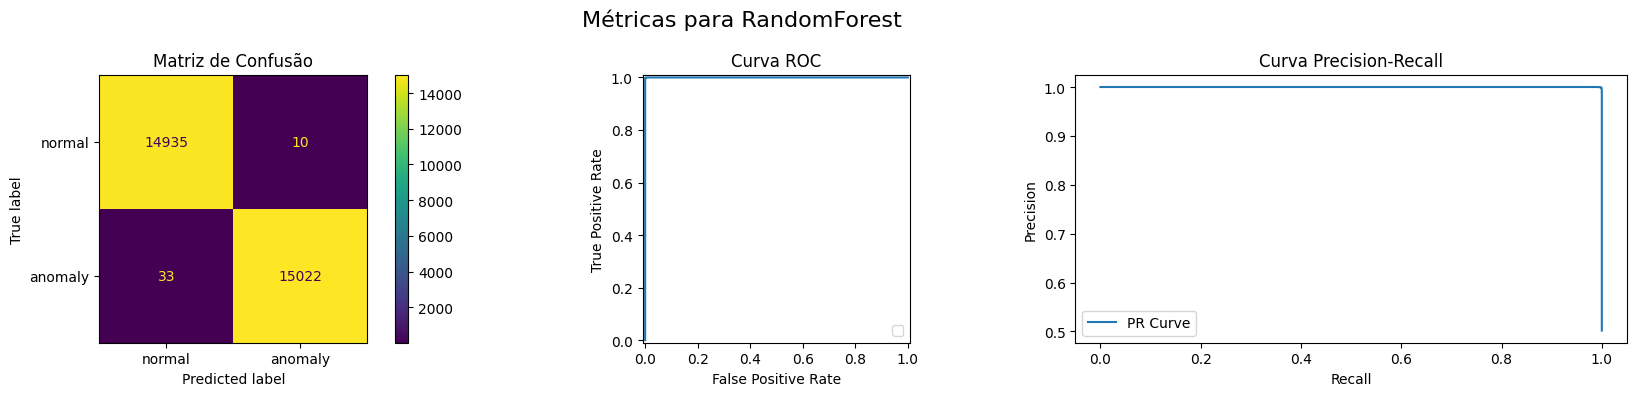


 Avaliando modelo: ExtraTrees
Accuracy: 0.9983
F1 Score: 0.9983
Precision: 0.9993
Recall: 0.9973
ROC AUC: 0.9999
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     14945
     anomaly       1.00      1.00      1.00     15055

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

fpr: 0.0007


/home/luizp/projects/puc/tcc/venv/lib64/python3.13/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


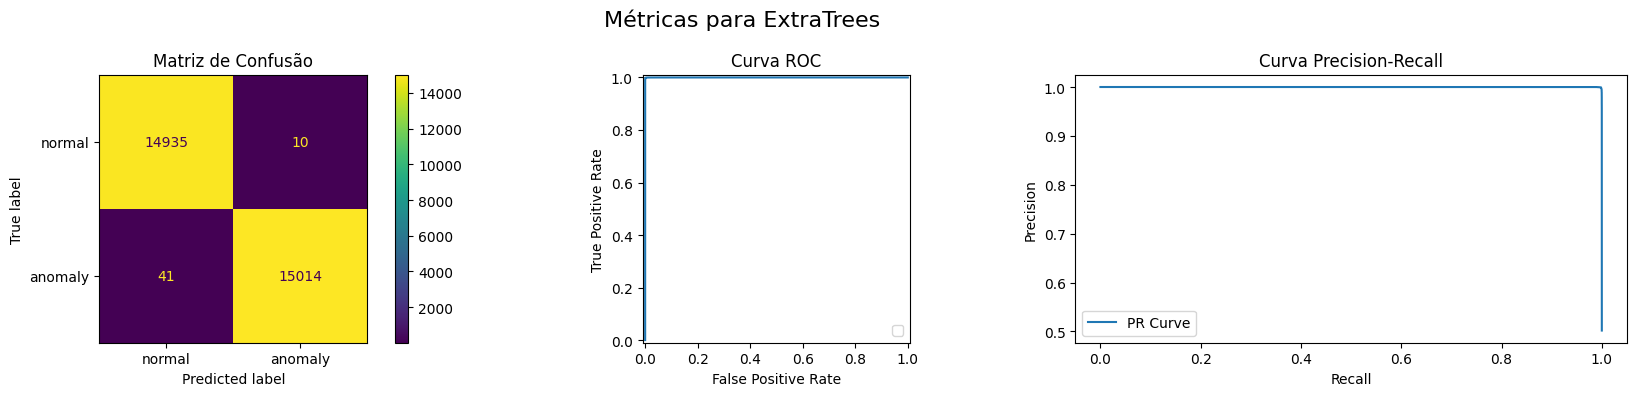


 Avaliando modelo: LogisticRegression
Accuracy: 0.9553
F1 Score: 0.9551
Precision: 0.9630
Recall: 0.9473
ROC AUC: 0.9919
              precision    recall  f1-score   support

      normal       0.95      0.96      0.96     14945
     anomaly       0.96      0.95      0.96     15055

    accuracy                           0.96     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.96      0.96      0.96     30000

fpr: 0.0367


/home/luizp/projects/puc/tcc/venv/lib64/python3.13/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


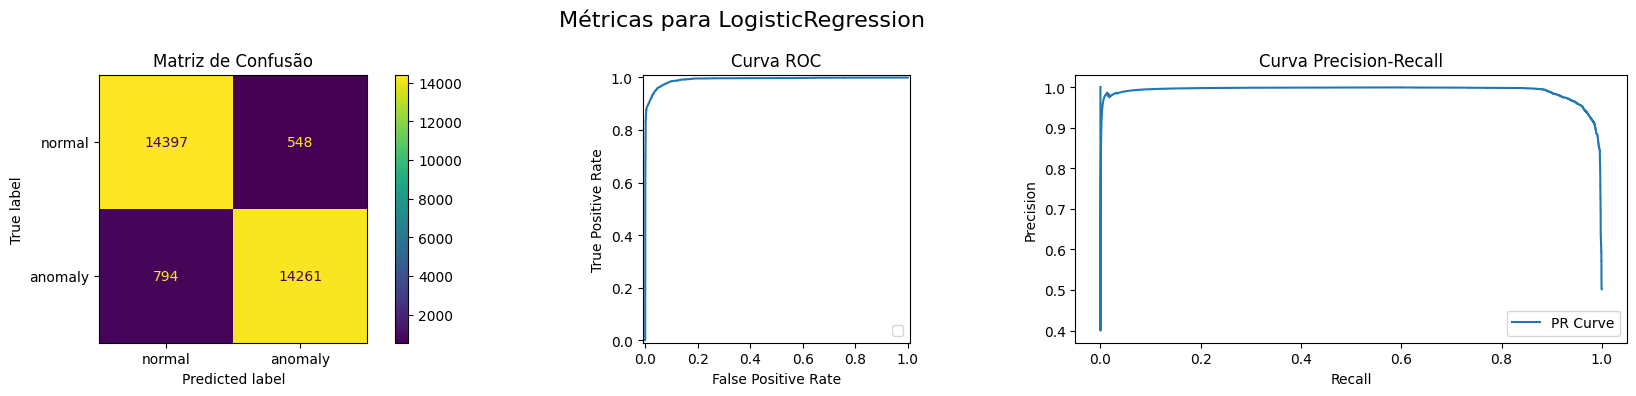


 Avaliando modelo: SVM
Accuracy: 0.9914
F1 Score: 0.9914
Precision: 0.9935
Recall: 0.9892
ROC AUC: 0.9991
              precision    recall  f1-score   support

      normal       0.99      0.99      0.99     14945
     anomaly       0.99      0.99      0.99     15055

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000

fpr: 0.0065


/home/luizp/projects/puc/tcc/venv/lib64/python3.13/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


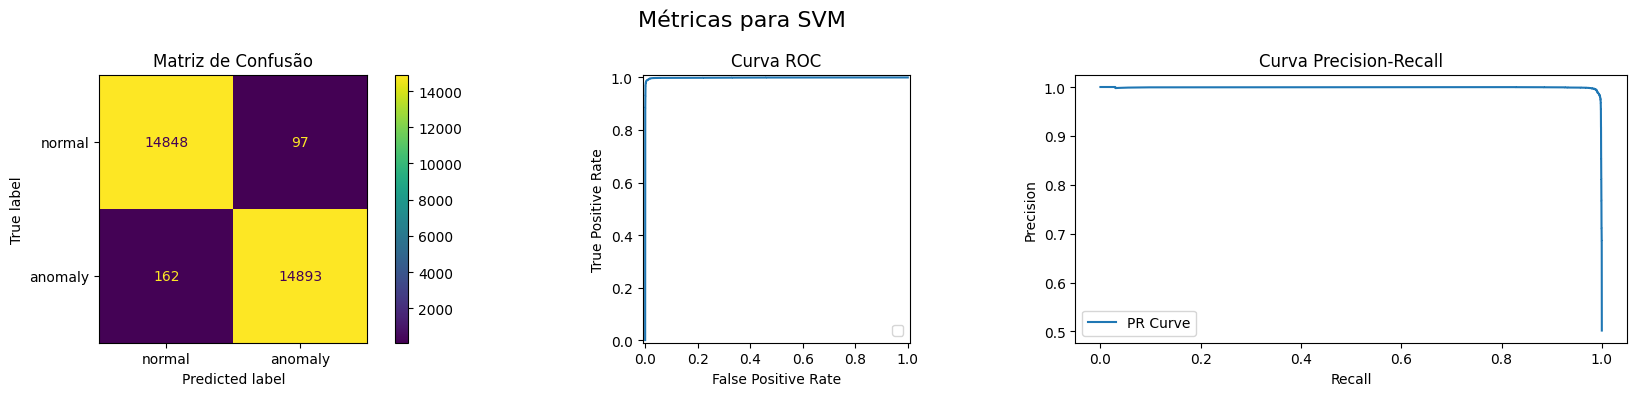


 Avaliando modelo: DecisionTree
Accuracy: 0.9977
F1 Score: 0.9977
Precision: 0.9979
Recall: 0.9974
ROC AUC: 0.9977
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     14945
     anomaly       1.00      1.00      1.00     15055

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

fpr: 0.0021


/home/luizp/projects/puc/tcc/venv/lib64/python3.13/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


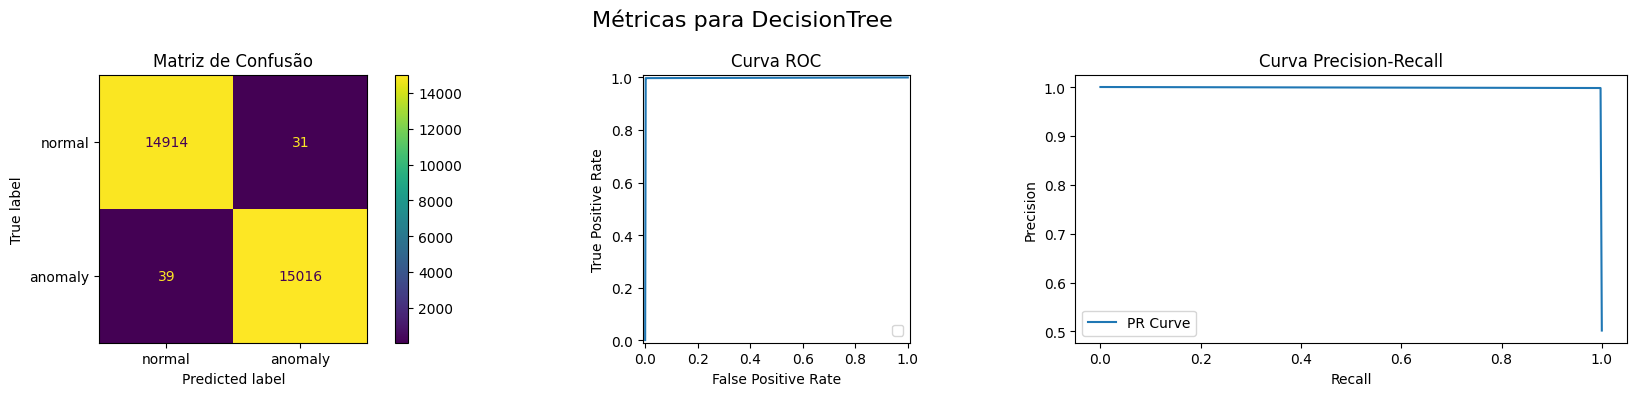

In [53]:
avaliar_modelos(modelos, treinoX, testeX, treinoY, testey, class_names=['normal', 'anomaly'])
